Import necessary libraries


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv'
df = pd.read_csv(url)


<ipython-input-3-f1f0a6f7358a>:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [4]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [5]:
df.shape

(38014, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [7]:
df.dtypes

,0
DateTime,object
Holiday,object
HolidayFlag,int64
DayOfWeek,int64
WeekOfYear,int64
Day,int64
Month,int64
Year,int64
PeriodOfDay,int64
ForecastWindProduction,object


In [8]:
df.isna().sum()

,0
DateTime,0
Holiday,36478
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,0


In [9]:
print("Unique values in 'holiday':", df['Holiday'].unique())
print("Unique values in 'holiday_flag':", df['HolidayFlag'].unique())
print("Unique values in 'period_of_day':", df['PeriodOfDay'].unique())
print("Unique values in 'forecast wind prediction':", df['ForecastWindProduction'].unique())


Unique values in 'holiday': [nan 'Christmas Eve' 'Christmas' "St Stephen's Day" "New Year's Eve"
 "New Year's Day" "St Patrick's Day" 'Good Friday' 'Holy Saturday'
 'Easter' 'Easter Monday' 'May Day' 'June Bank Holiday'
 'August Bank Holiday' 'October Bank Holiday']
Unique values in 'holiday_flag': [0 1]
Unique values in 'period_of_day': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Unique values in 'forecast wind prediction': ['315.31' '321.80' '328.57' ... 1123.67 1094.24 1064.0]


In [10]:
df = df.drop('Holiday', axis=1)


In [11]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [12]:
for column in df.columns:
  print(f"Unique values in '{column}': {df[column].nunique()}")


Unique values in 'DateTime': 38014
Unique values in 'HolidayFlag': 2
Unique values in 'DayOfWeek': 7
Unique values in 'WeekOfYear': 52
Unique values in 'Day': 31
Unique values in 'Month': 12
Unique values in 'Year': 3
Unique values in 'PeriodOfDay': 48
Unique values in 'ForecastWindProduction': 29312
Unique values in 'SystemLoadEA': 36166
Unique values in 'SMPEA': 8661
Unique values in 'ORKTemperature': 32
Unique values in 'ORKWindspeed': 53
Unique values in 'CO2Intensity': 25115
Unique values in 'ActualWindProduction': 2940
Unique values in 'SystemLoadEP2': 36171
Unique values in 'SMPEP2': 9277


In [13]:
df = df.drop('DateTime', axis=1)

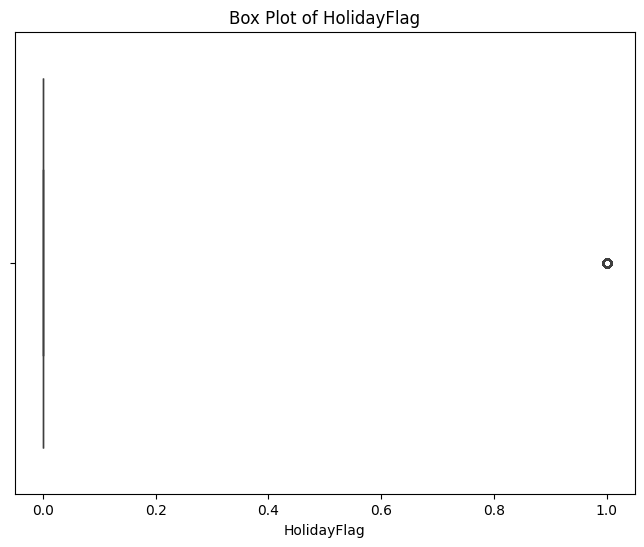

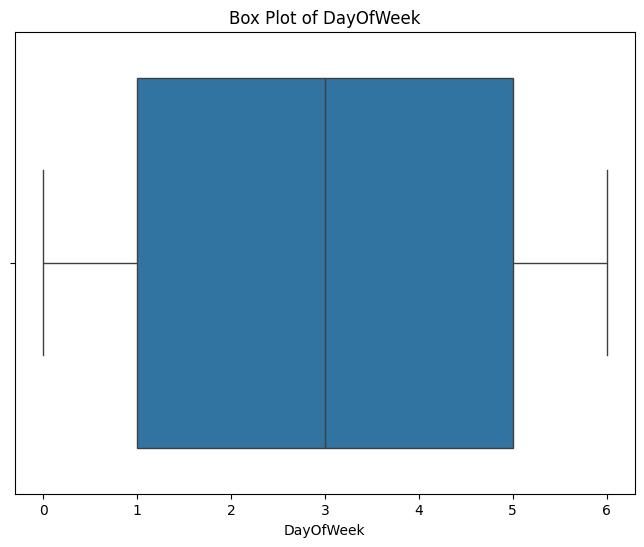

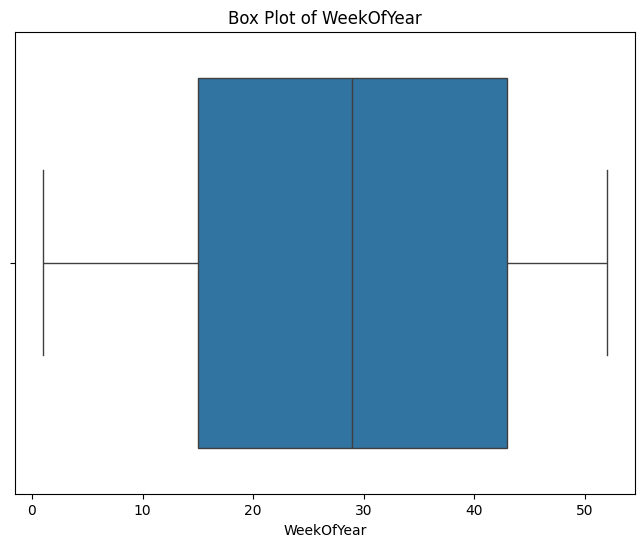

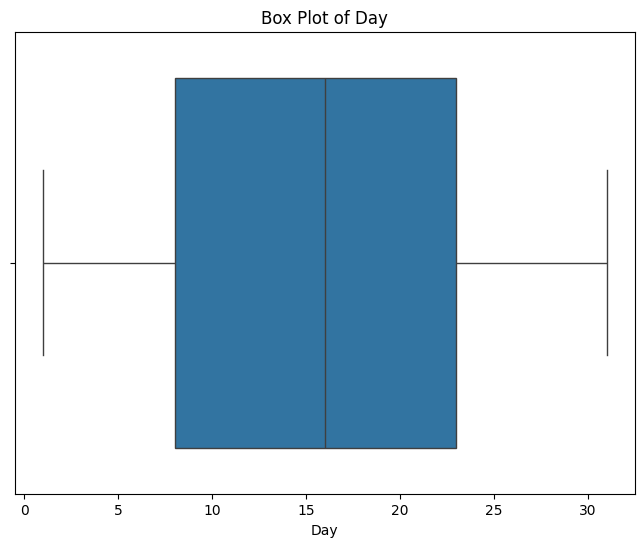

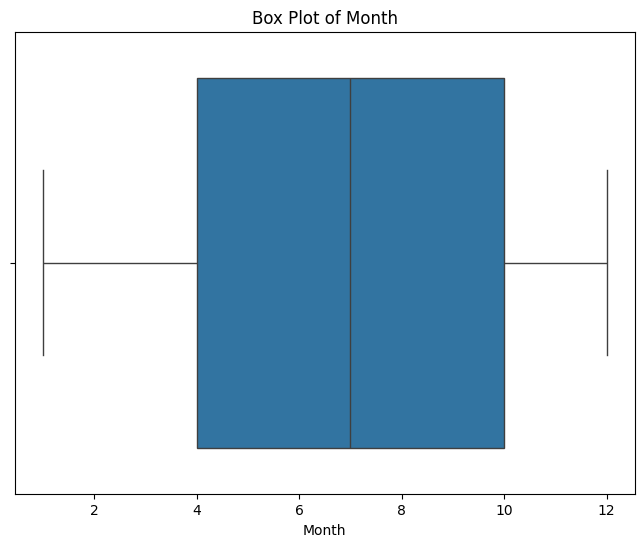

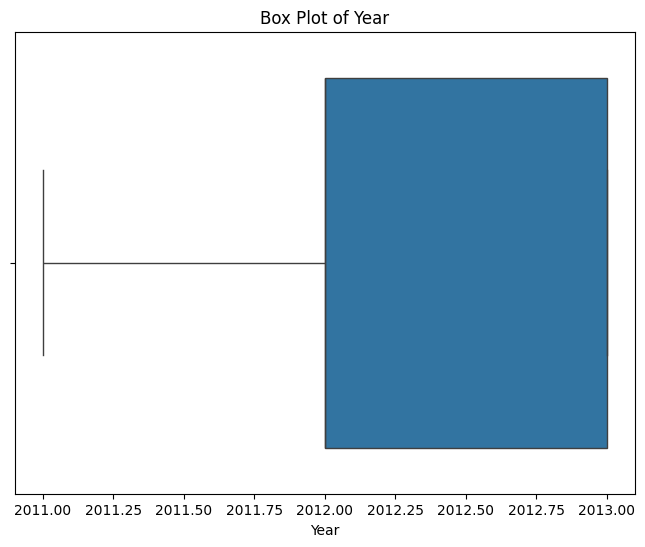

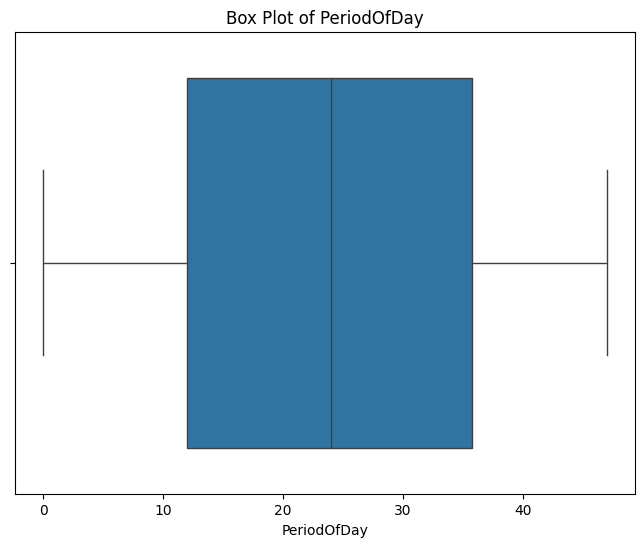

In [14]:
# Plot box plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()


In [15]:
for column in df.columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')
  df[column] = df[column].fillna(df[column].median())


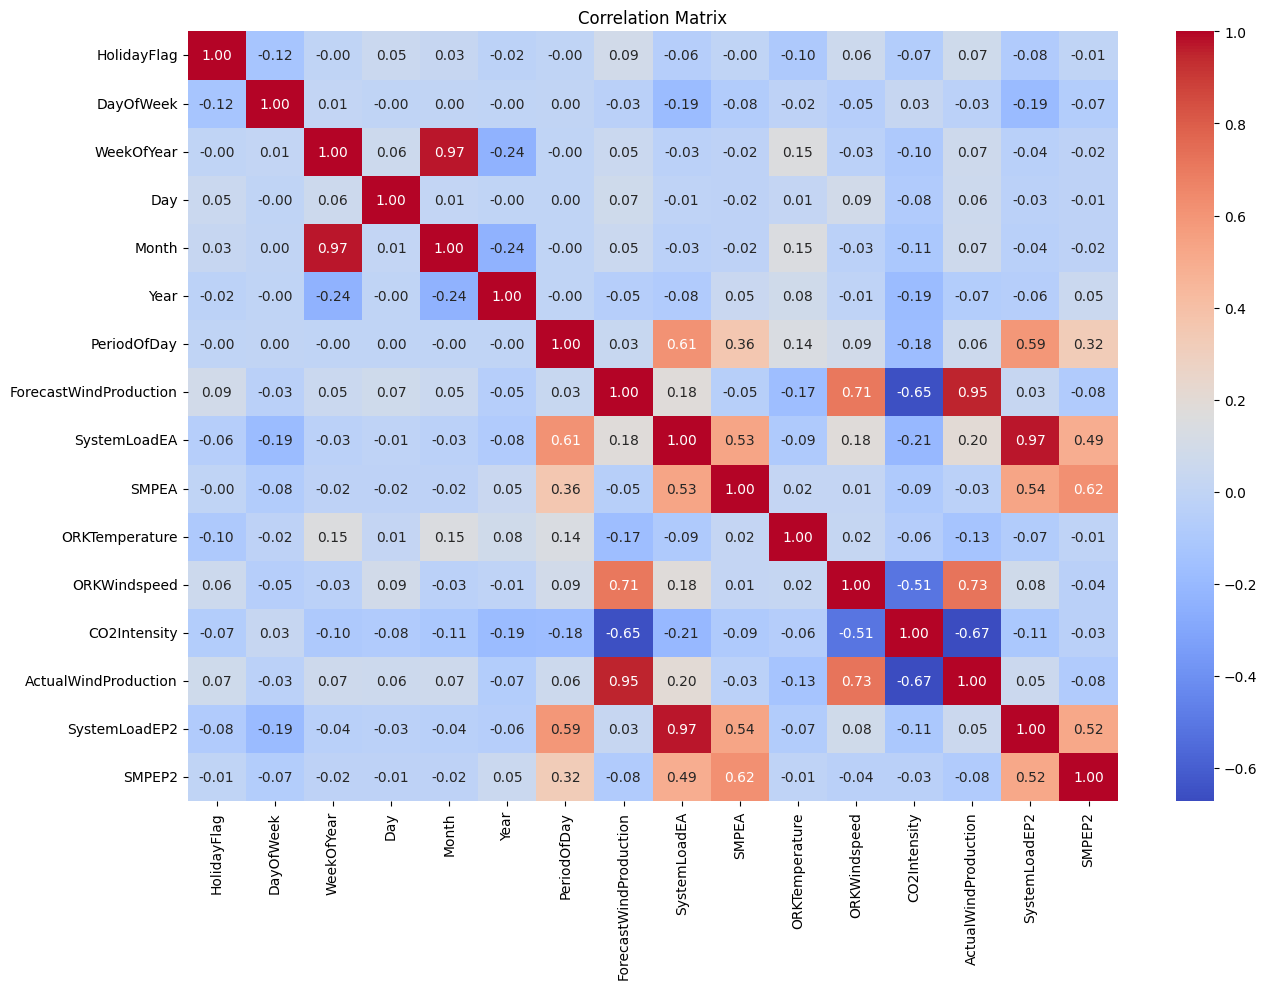

In [16]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [43]:
X = df.drop("SMPEP2", axis=1)
y = df["SMPEP2"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 21.705056425723317
R² Score: 0.6069094560941861


In [50]:
# Define the Random Forest model with tuned hyperparameters
rf_tuned = RandomForestRegressor(
    n_estimators=150,      # Number of trees in the forest
    max_depth=20,          # Maximum depth of each tree
    min_samples_split=2,   # Minimum number of samples to split a node
    min_samples_leaf=2,    # Minimum number of samples at a leaf node
    max_features='sqrt',   # Number of features to consider for the best split
    random_state=42
)

# Train the tuned model
rf_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_tuned.predict(X_test)

# Evaluate the tuned model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 21.36541529595855
R² Score: 0.6191153801481302


In [51]:
import pickle

# Save the model to a pickle file
filename = 'rf_tuned_model.pkl'
pickle.dump(rf_tuned, open(filename, 'wb'))

from google.colab import files
files.download('rf_tuned_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>